# LGMVIP Data Science Internship   (LetsGrowMore)
 
## Author : Muhamamd Hassan

## Batch : December 2021

## Domain: Data Science

## Language : Python


## About Iris dataset 
The IRIS Dataset which basically is a data about three of a Flower type in form of its sepal length, sepal width, petal length, and petal width. The data set consists of 50 samples from each of the three species of Iris (Setosa, Virginic, Versicolor).

Our Objective is to classifly a new flower as belonging to one of the 3 classes given the 4 features.

In [1]:
#Loading the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

%matplotlib inline

## Loading the dataset

In [2]:
#Loading the Dataset into pandas DataFrame
dataset_iris = pd.read_csv('C:/Users/user/iris.csv')

## Exploratory Data Analysis

In [3]:
#First 5 Columns of the dataset
dataset_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#Shape of dataset no of Rows and Columns
dataset_iris.shape

(150, 6)

In [5]:
#Now we have to drop the "Id" columns because we dont need
dataset_iris.drop('Id', axis=1, inplace=True)

In [6]:
#Dataset information.
dataset_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
#Print the total no of columns
print(dataset_iris.columns)

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [8]:
# How many data points for each class are present?
# How many flowers for each species are present?

dataset_iris['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [9]:
# dataset_iris.unique()

In [10]:
#Corelation between the numerical colums
dataset_iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


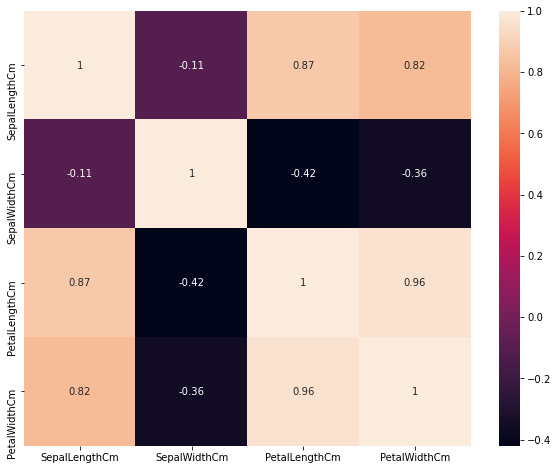

In [11]:
#Now Visualize the correlation 
plt.figure(figsize=(10,8))
sns.heatmap(dataset_iris.corr(), annot=True)

## Data Visualization

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


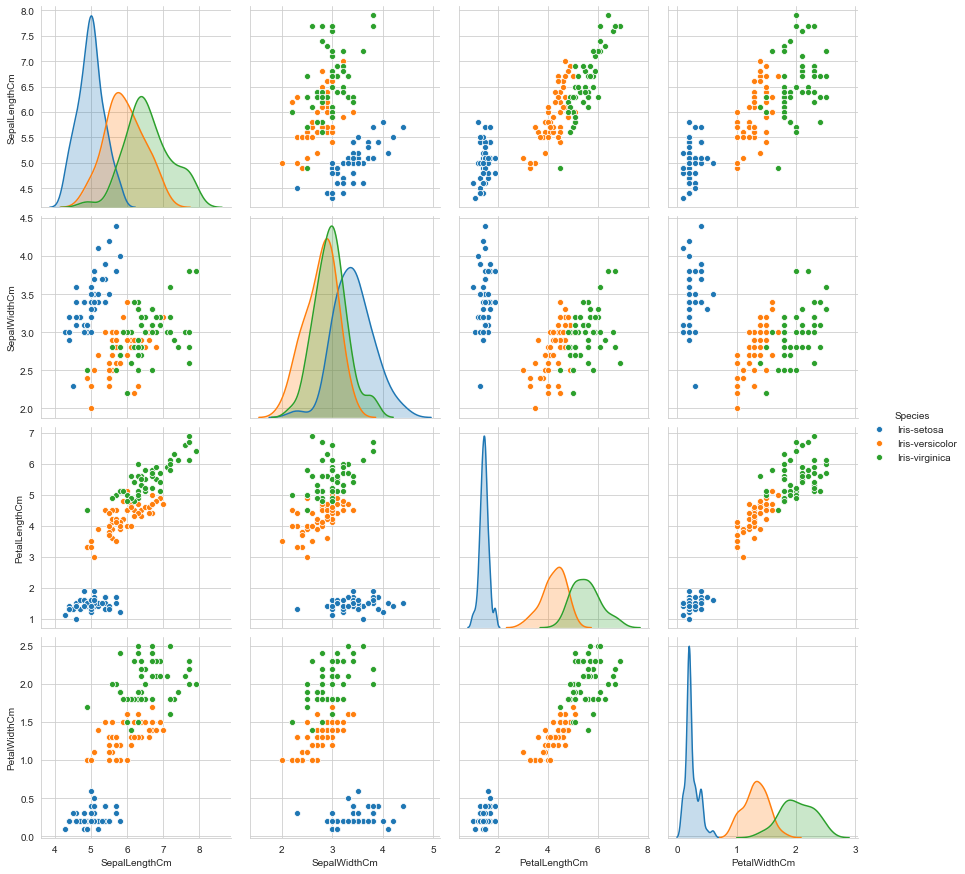

In [51]:
#Pair ploting
sns.pairplot(dataset_iris, hue="Species", size=3)

## 2D Scatter Plot

<Figure size 864x720 with 0 Axes>

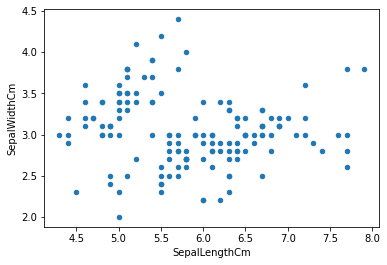

In [13]:
plt.figure(figsize=(12,10))
dataset_iris.plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm')
plt.show();

In [14]:
num_cols = dataset_iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
num_cols

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


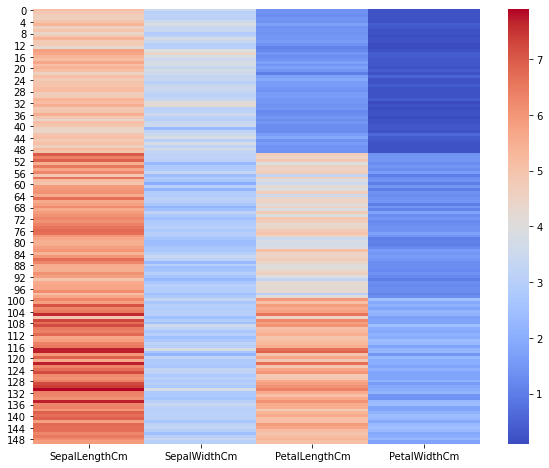

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(num_cols,cmap='coolwarm');

In [16]:
#Checking Skewness in data
dataset_iris.skew()

SepalLengthCm    0.314911
SepalWidthCm     0.334053
PetalLengthCm   -0.274464
PetalWidthCm    -0.104997
dtype: float64

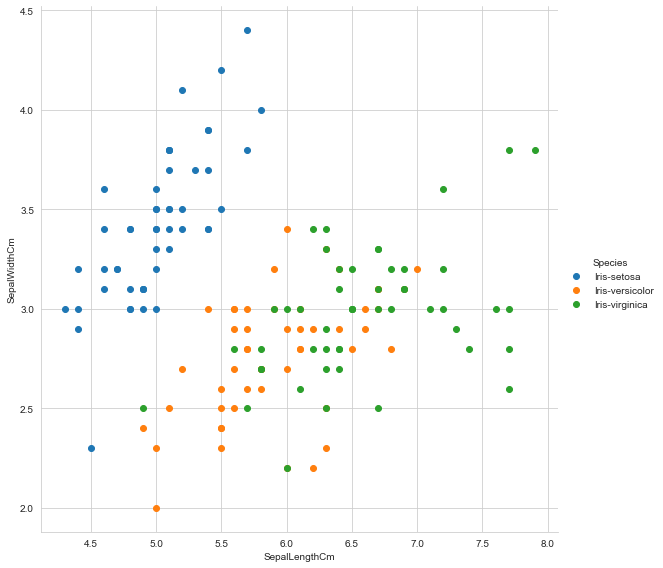

In [48]:
sns.set_style("whitegrid")
sns.FacetGrid(dataset_iris, hue='Species', height=8)\
    .map(plt.scatter, "SepalLengthCm", "SepalWidthCm")\
    .add_legend()
plt.show();

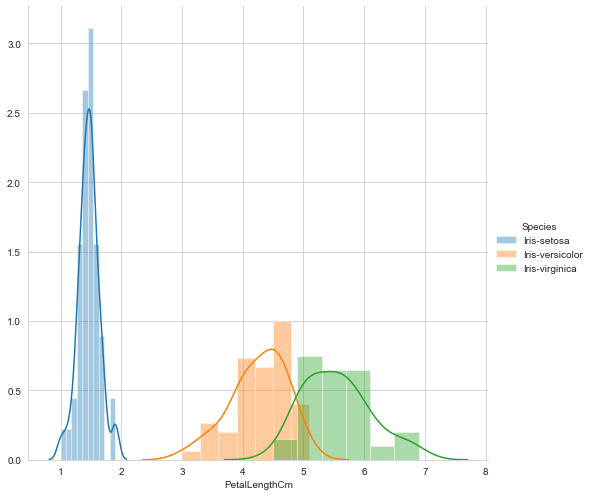

In [50]:
sns.FacetGrid(dataset_iris, hue='Species', height=7)\
    .map(sns.distplot, "PetalLengthCm")\
    .add_legend()
plt.show();

## Outlier in data set

In [17]:
dataset_iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

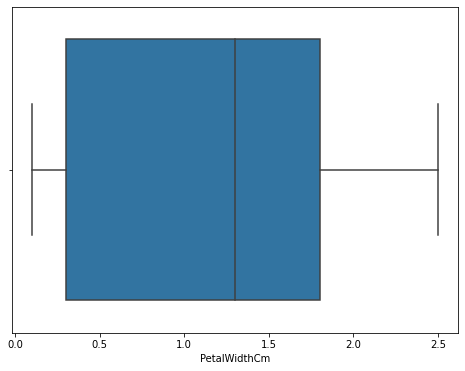

In [18]:
plt.figure(figsize=(8,6))
sns.boxplot(dataset_iris['PetalWidthCm']);

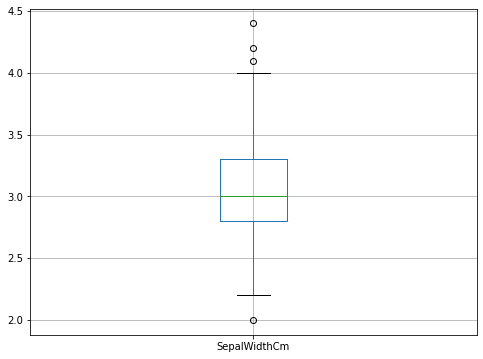

In [19]:
plt.figure(figsize=(8,6))
dataset_iris.boxplot(column='SepalWidthCm');

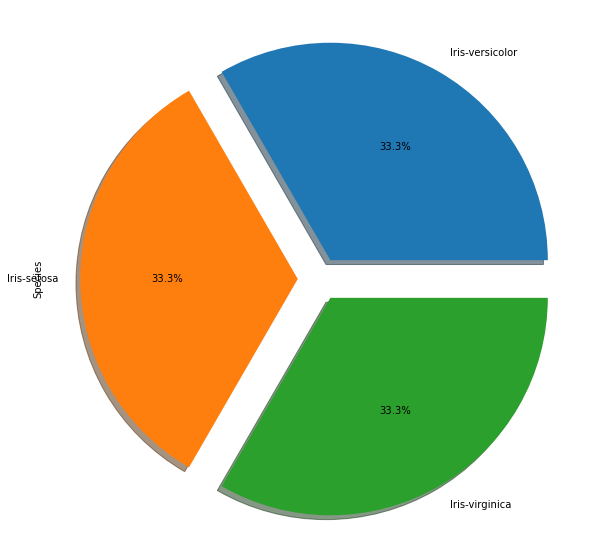

In [20]:
#let see by Pie Chart
dataset_iris['Species'].value_counts().plot.pie(explode =[0.1,0.1,0.1], autopct='%1.1f%%', shadow=True, figsize=(10,10));

## Decision Tree 

In [21]:
#importing the libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [22]:
dataset_iris.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [23]:
#Sclicing the data into X and y means separating the feature and target variable
X = dataset_iris.iloc[:,:3]
y = dataset_iris.iloc[:, -1:]

In [24]:
X[0:5] #displaying first 5 values

,SepalLengthCm,SepalWidthCm,PetalLengthCm
0,5.1,3.5,1.4
1,4.9,3.0,1.4
2,4.7,3.2,1.3
3,4.6,3.1,1.5
4,5.0,3.6,1.4


In [25]:
y[0:5]

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [26]:
#Spliting the data into X and y or 
#training and test data are separated on the base of 70% data will be train and 30% will be test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [27]:
#Initialize the model 
model = DecisionTreeClassifier()

In [28]:
#train the model 
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [29]:
#Predict the model
pred = model.predict(X_test)

In [30]:
#Score of our model
print(model.score(X_test, y_test))

0.9555555555555556


## Metrix and report 

In [31]:
#importing the required libraries for matrix
from sklearn.metrics import confusion_matrix, classification_report

In [32]:
#Displaying the Classification report 
print(classification_report(y_test, pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.89      0.94        18
 Iris-virginica       0.85      1.00      0.92        11

       accuracy                           0.96        45
      macro avg       0.95      0.96      0.95        45
   weighted avg       0.96      0.96      0.96        45



In [33]:
#Confusion matri 
print(confusion_matrix(y_test, pred))

[[16  0  0]
 [ 0 16  2]
 [ 0  0 11]]
